From https://www.tensorflow.org/tutorials/keras/classification. 
Will be creating a model using Keras api to classify MNIST Clothing dataset 

In [4]:
!pip install matplotlib
!pip install tensorflow


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-07-10 16:24:18.683842: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 16:24:18.684381: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 16:24:18.695925: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 16:24:18.703742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 16:24:18.719630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

# Loading dataset

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Checking and modifying dataset

In [9]:
train_images.shape
#ie there are 60000 images of size 28 * 28

(60000, 28, 28)

In [10]:
train_labels.shape
#ie, 1D array of 60000 elements

(60000,)

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Since all the labels are in the form of numbers(0 to 9). The following list contains their meanings with index as labels.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

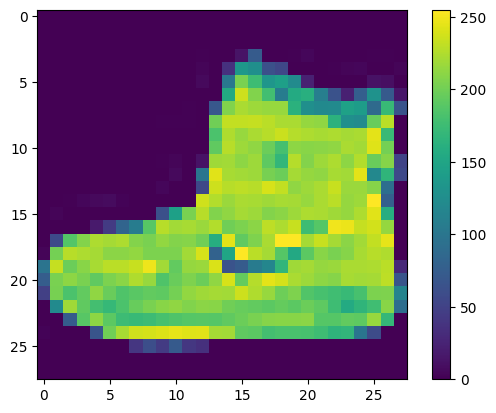

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

#ie the value for each pixel ranges from (0 to 255).
#We need to scale it to (0 to 1), for both train and test data.

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

# Building the model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),    #converts each image from 2D array of 28*28 to 1D array of length 28*28
    tf.keras.layers.Dense(128, activation = "relu"),    #Dense means fully connected, 128 means no of neurons in this layer
    tf.keras.layers.Dense(10)                           #final layer, 10 neurons since 10 classes
])

/home/users/harshit.sahu/Desktop/github_pros/tensorflow_test/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(
    optimizer = "adam",
    loss = loss_fn,
    metrics = ['accuracy']
)

# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7867 - loss: 0.6248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.3886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8747 - loss: 0.3440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8867 - loss: 0.3157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8897 - loss: 0.3022
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8992 - loss: 0.2712
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9044 - loss: 0.2589
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9097 - loss: 0.2427
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9114 - loss: 0.2380


In [18]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8830 - loss: 0.3303


[0.3302512764930725, 0.8830000162124634]

# Now predict

In [19]:
#  Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

probab_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [20]:
predictions = probab_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
predictions[0]

# A prediction is an array of 10 numbers. 
# hey represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

array([1.4397339e-05, 1.6368741e-09, 1.1166842e-08, 1.6456982e-10,
       6.9810255e-08, 1.2603896e-03, 2.7392352e-06, 6.2431032e-03,
       1.2619175e-04, 9.9235314e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

# Predict for a single image

In [23]:
img = test_images[1]
img.shape

(28, 28)

In [24]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:

img = np.expand_dims(img, 0)            #0 means that a new axis will appear on 0th index

In [25]:
img.shape

(1, 28, 28)

In [26]:
pred = probab_model.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[1.4499967e-05, 4.4566386e-12, 9.9977201e-01, 1.0164373e-10,
        1.4434631e-04, 5.7778890e-12, 6.9181740e-05, 7.4412453e-17,
        1.5962637e-11, 1.4692286e-12]], dtype=float32)

In [27]:
class_names[np.argmax(pred)]

'Pullover'

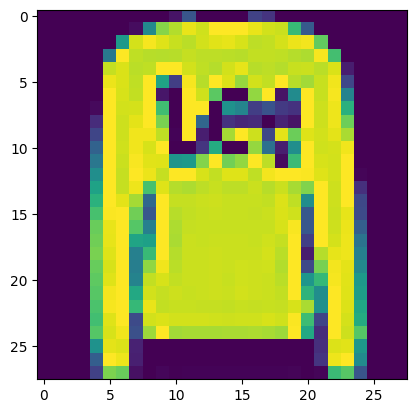

In [30]:
plt.figure()
plt.imshow(test_images[1])
plt.show()


The probability for label 9 is maximum, which corresponds to pullover.